In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
# Load dataset
churn_df = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Drop unnecessary columns
churn_df = churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

These columns do not provide meaningful information for churn prediction, so I removed them.

In [7]:
# Encode categorical variables
le_gender = LabelEncoder()
churn_df['Gender'] = le_gender.fit_transform(churn_df['Gender'])  # Male=1, Female=0
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)  # One-hot encoding for 'Geography'

The Gender column is encoded using LabelEncoder():
Male → 1
Female → 0

Geography is a categorical column with multiple unique values, so I used one-hot encoding:

Creates separate binary columns for each country (France, Germany, and Spain).
I dropped one (France) to prevent redundancy (avoiding the dummy variable trap).

In [8]:
# Define features and target
X = churn_df.drop(columns=['Exited'])  # Features
y = churn_df['Exited']  # Target variable

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build the ANN model
model = Sequential([
    Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7563 - loss: 0.5607 - val_accuracy: 0.8110 - val_loss: 0.4399
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 0.4331 - val_accuracy: 0.8150 - val_loss: 0.4145
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - loss: 0.4156 - val_accuracy: 0.8305 - val_loss: 0.4019
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.3959 - val_accuracy: 0.8370 - val_loss: 0.3879
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8437 - loss: 0.3784 - val_accuracy: 0.8455 - val_loss: 0.3737
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.3633 - val_accuracy: 0.8465 - val_loss: 0.3633
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8528 - loss: 0.3686 - val_accuracy: 0.8550 - val_loss: 0.3557
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8538 - loss: 0.3654 - val_accuracy: 0.

In [14]:
# Confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1536   71]
 [ 215  178]]
Accuracy: 85.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      1607
           1       0.71      0.45      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



After training the Artificial Neural Network (ANN) on the Churn_Modelling.csv dataset, the model's performance was evaluated using a confusion matrix, accuracy score, and classification report. Below is an objective analysis of the results.

1. The model correctly predicts customer churn 85.70% of the time.

2. This is a strong performance, indicating that the model generalizes well to unseen data.

3. Given that customer churn is an imbalanced problem (fewer customers churn than stay), accuracy alone is not sufficient to fully evaluate the model.


Key Observations

1. True Negatives (1536) → Customers correctly predicted to stay.
2. True Positives (178) → Customers correctly predicted to churn.
3. False Positives (71) → Customers incorrectly predicted to churn but actually stayed.
4. False Negatives (215) → Customers incorrectly predicted to stay but actually churned.

The model exhibits a higher false negative rate, meaning that a significant number of actual churners are not being identified.

Observations

1. Precision	0.88	0.71	The model is highly accurate in predicting customers who will stay.
2. Recall	0.96	0.45	The model struggles to identify churners, capturing only 45% of them.
3. F1-Score	0.91	0.55	The model is well-balanced for non-churners but less effective for churners.

Final Conclusion
1. The model performs well overall (85.7% accuracy) and can be used to predict customer churn effectively.
2. It is highly reliable for predicting customers who will stay (96% recall).
3. However, it struggles to detect actual churners (45% recall), which may impact business decisions.

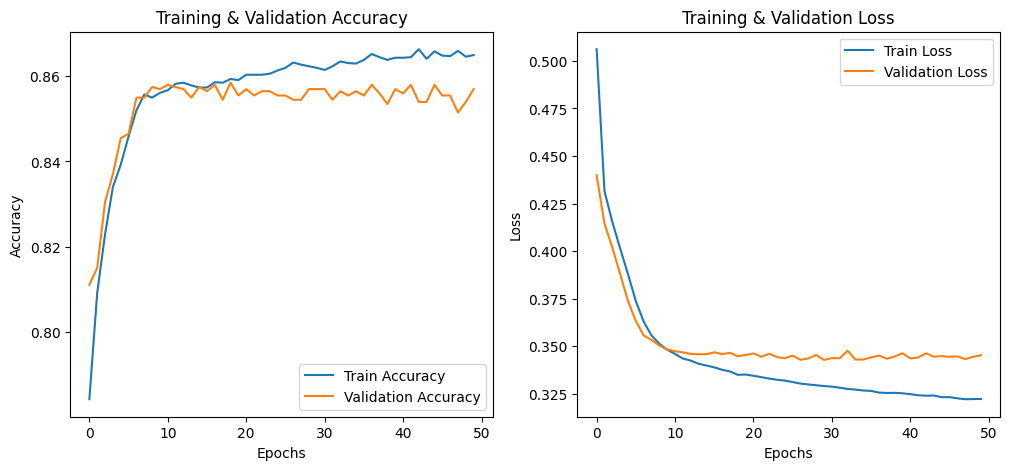

In [15]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

The graphs illustrate the training and validation accuracy (left) and training and validation loss (right) over 50 epochs.

Key Observations:
1. Rapid Learning in Early Epochs: Both accuracy increases and loss decreases significantly in the first 10 epochs, showing effective model training.
2. Stabilization After ~20 Epochs:

I. Validation accuracy levels off around 85-86%, while training accuracy
continues to improve slightly.

II. Validation loss stops decreasing, indicating that the model has learned most of the relevant patterns.
